# Importing libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Reading the data

In [79]:
df = pd.read_excel("Datasets/MetroManilaAccidents(City).xlsx")
df.head()

,Damage_to_property,Fatal,Non_Fatal,Year,City
0,17820,94,4580,2020,Quezon
1,2334,6,536,2020,Mandaluyong
2,2022,18,950,2020,Marikina
3,3397,15,833,2020,Pasig
4,573,4,178,2020,San Juan


# Pivot Table

In [80]:
df.pivot_table(index="Year", columns="City", aggfunc="sum", margins=True)

Damage_to_property                                                       \
City           Caloocan Las Pinas Makati Malabon Mandaluyong Manila Marikina   
Year                                                                           
2010               2429      4395   6301     563        3102   4096     2353   
2011               2425      2547   6061     599        3058   3555     2537   
2012               2402      2472   6498     528        2863   7331     2315   
2013               2605      2594   7323     606        3124   7529     2169   
2014               2341      2337   7825     536        3540   8577     1537   
2015               2933      2357   4236     672        3715   9680     2596   
2016               2935      2473  11487     674        5219  10093     3530   
2017               3288      2691  10680     784        4925   9999     3446   
2018                731       625   1510     143         837   1366      720   
2019               3691      2792  10591     712        5945   9724     3771   
2020               2153      1929   3695     419        2334   5398     2022   
All               27933     27212  76207    6236       38662  77348    26996   

                                   ... Non_Fatal                         \
City Muntinlupa Navotas Paranaque  ...   Navotas Paranaque Pasay  Pasig   
Year                               ...                                    
2010       2649     654      3129  ...       181       839   528    837   
2011       2224     625      2976  ...       168       912   576   1210   
2012       2431     517      2942  ...       265       901   583   1117   
2013       2386     521      3279  ...       351       991   583    945   
2014       2518     513      3752  ...       299      1172   627    879   
2015       2807     507      3730  ...       211      1183   712   1375   
2016       2907     550      4286  ...       212      1041   723   1179   
2017       3316     641      4149  ...       381       992   699    681   
2018        556      80      1025  ...       215       897   631    716   
2019       3220     626      4405  ...       320      1017   890    680   
2020       1844     230      2800  ...       119       770   652    833   
All       26858    5464     36473  ...      2722     10715  7204  10452   

                                                        
City Pateros Quezon San Juan Taguig Valenzuela     All  
Year                                                    
2010      14   4797      212    808        694   15423  
2011       1   5031      231    873       1067   15827  
2012       2   5118      204    841       1070   16708  
2013       0   5154      119    917       1092   16740  
2014      20   4488      270    846       1080   16665  
2015       4   4466      266    823        722   16846  
2016       9   4755      250    591        795   16416  
2017       1   4729      225    626        745   15505  
2018      16   8427      181    568        492   18691  
2019      25   5347      236    932        677   17891  
2020      22   4580      178    637        619   14465  
All      114  56892     2372   8462       9053  181177  

[12 rows x 54 columns]

# Data preprocessing

In [83]:
data=df.iloc[:,0:2].values

# Identifying optimum number of cluster

In [84]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=50)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve')
    plt.grid(True)
    plt.show()

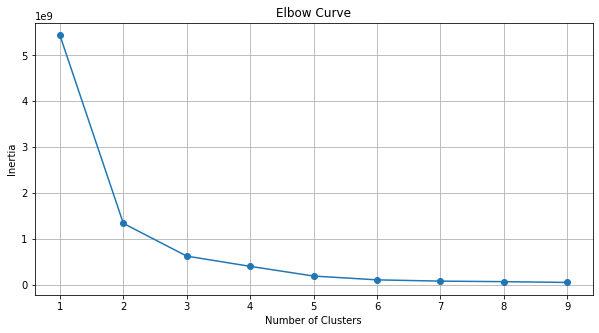

In [85]:
optimise_k_means(df.iloc[:,0:2].values, 10)

# Applying K-means Clustering

In [86]:
cluster = KMeans(n_clusters = 3)
model = cluster.fit(data)
clusters = model.labels_
clusters

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [87]:
centroid_values = model.cluster_centers_
centroid_values

array([[7.02411429e+03, 2.83714286e+01],
       [1.98600000e+03, 1.41760563e+01],
       [2.37845000e+04, 1.27900000e+02]])

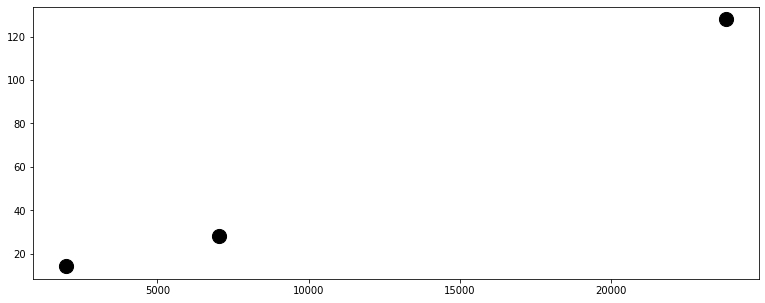

In [88]:
plt.scatter(centroid_values[:,0], centroid_values[:,1], c = 'black', s = 200)
plt.show()

# Plotting the result
Visualising the cluster on the first two columns

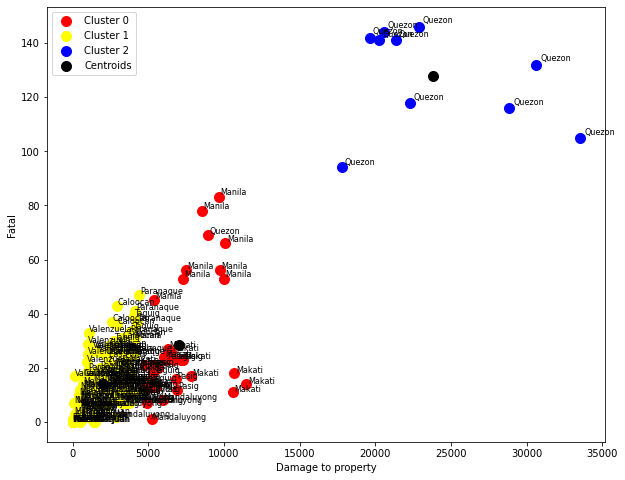

In [89]:
plt.figure(figsize= (10,8))
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1],
           s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1],
           s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1],
           s = 100, c = 'blue', label = 'Cluster 2')

# #Plotting the centroids of the clusters
# plt.scatter(centroid_values[:, 0], centroid_values[:,1],
#            s = 100, c = 'black', label = 'Centroids')
# plt.legend()
# plt.xlabel('Damage to property')
# plt.ylabel('Fatal')
# plt.show()

for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]
    plt.text(x * (1 + 0.01), y * (1 + 0.01), df.City[i], fontsize=8)
    
# plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1],
#            s = 100, c = 'red', label = 'Cluster 0')
# plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1],
#            s = 100, c = 'green', label = 'Cluster 1')
# plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1],
#            s = 100, c = 'blue', label = 'Cluster 2')

# #Plotting the centroids of the clusters
plt.scatter(centroid_values[:, 0], centroid_values[:,1],
           s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.xlabel('Damage to property')
plt.ylabel('Fatal')
plt.show()

# Descriptive Statistics

In [90]:
df.describe()

,Damage_to_property,Fatal,Non_Fatal,Year
count,187.000000,187.000000,187.000000,187.000000
mean,4094.657754,22.914439,968.860963,2015.000000
std,5405.793891,29.102214,1141.131791,3.170767
min,2.000000,0.000000,0.000000,2010.000000
25%,1041.000000,8.000000,486.500000,2012.000000
50%,2691.000000,15.000000,770.000000,2015.000000
75%,4400.000000,25.000000,1017.500000,2018.000000
max,33515.000000,146.000000,8427.000000,2020.000000


In [91]:
df['Cluster'] = cluster.labels_

# DataFrame

In [92]:
from IPython.display import display, HTML

In [93]:
display(HTML(df.to_html()))

,Damage_to_property,Fatal,Non_Fatal,Year,City,Cluster
0,17820,94,4580,2020,Quezon,2
1,2334,6,536,2020,Mandaluyong,1
2,2022,18,950,2020,Marikina,1
3,3397,15,833,2020,Pasig,1
4,573,4,178,2020,San Juan,1
5,2153,25,882,2020,Caloocan,1
6,419,10,267,2020,Malabon,1
7,230,7,119,2020,Navotas,1
8,877,17,619,2020,Valenzuela,1
9,1929,13,798,2020,Las Pinas,1


In [94]:
df.Cluster.value_counts()

1    142
0     35
2     10
Name: Cluster, dtype: int64

In [95]:
df['Total'] = df.loc[:,['Fatal','Non_Fatal', 'Damage_to_property']].sum(axis=1)

In [96]:
groupedvalues = df.groupby('City').sum().reset_index()
groupedvalues.head()

,City,Damage_to_property,Fatal,Non_Fatal,Year,Cluster,Total
0,Caloocan,27933,311,10929,22165,11,39173
1,Las Pinas,27212,145,8595,22165,11,35952
2,Makati,76207,204,10211,22165,3,86622
3,Malabon,6236,74,3923,22165,11,10233
4,Mandaluyong,38662,72,5655,22165,8,44389


<Figure size 1656x504 with 0 Axes>

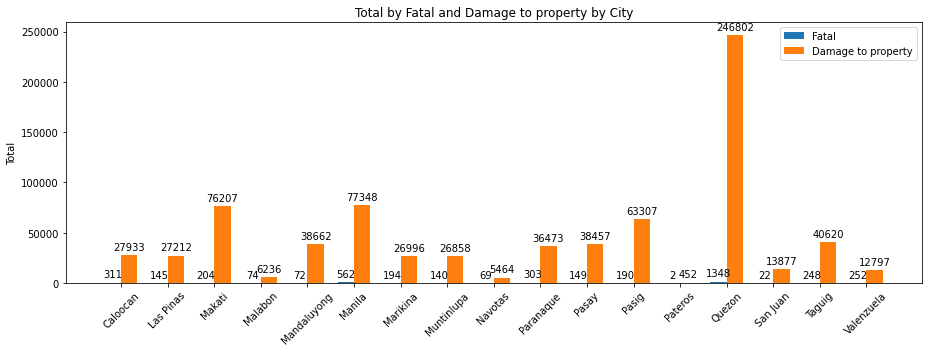

In [97]:
import matplotlib.pyplot as plt
import numpy as np

labels = groupedvalues.iloc[:,0].values
fatal = groupedvalues.iloc[:,2].values
damage_to_property = groupedvalues.iloc[:,1].values

fatal_total = 0
for i in fatal:
    fatal_total += i

damage_to_property_total = 0
for i in damage_to_property:
    damage_to_property_total += i


plt.rcParams["figure.figsize"] = (13,5)
# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
plt.figure(figsize=(23,7))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fatal, width, label='Fatal')
rects2 = ax.bar(x + width/2, damage_to_property, width, label='Damage to property')

# str(fatal) + ' (' + str(round((round(fatal,2) / fatal_total) * 100, 2)) + ')%'
#str(non_fatal) + ' (' + str(round((round(non_fatal,2) / non_fatal_total) * 100, 2)) + ')%' 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total')
ax.set_title('Total by Fatal and Damage to property by City')
ax.set_xticks(x, labels, rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [105]:
df['Fatal_Dmg_Total'] = df.loc[:,['Fatal', 'Damage_to_property']].sum(axis=1)
groupedvalues = df.groupby('City').sum().reset_index()
groupedvalues.head()
overall_total =groupedvalues.iloc[:,7].values
total = 0
for i in overall_total:
    total += i
total

,City,Damage_to_property,Fatal,Non_Fatal,Year,Cluster,Total,Fatal_Dmg_Total
0,Caloocan,27933,311,10929,22165,11,39173,28244
1,Las Pinas,27212,145,8595,22165,11,35952,27357
2,Makati,76207,204,10211,22165,3,86622,76411
3,Malabon,6236,74,3923,22165,11,10233,6310
4,Mandaluyong,38662,72,5655,22165,8,44389,38734


Text(0.5, 1.0, 'City')

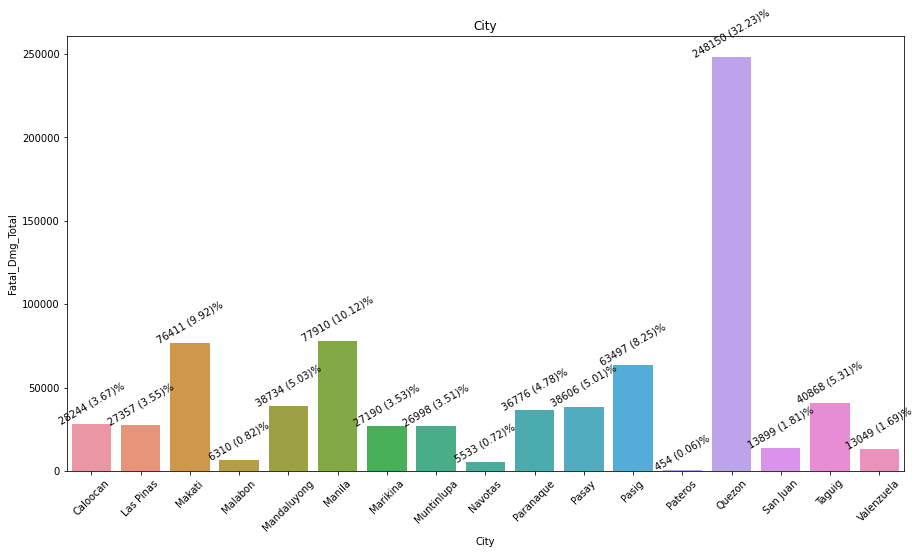

In [106]:
plt.figure(figsize=(15,8))
g =sns.barplot(x='City',y='Fatal_Dmg_Total',data=groupedvalues)
plt.xticks(rotation=45)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Fatal_Dmg_Total, str(round(row.Fatal_Dmg_Total,2)) +
       ' (' + str(round((round(row.Fatal_Dmg_Total,2) / total) * 100, 2)) + ')%' ,
       color='black', ha="center",fontsize = 10, rotation=30)
plt.title('City')

In [53]:
groupedvalues = df.groupby('City').sum().reset_index()
groupedvalues.head()

,City,Damage_to_property,Fatal,Non_Fatal,Year,Cluster,Total
0,Caloocan,27933,311,10929,22165,0,39173
1,Las Pinas,27212,145,8595,22165,0,35952
2,Makati,76207,204,10211,22165,16,86622
3,Malabon,6236,74,3923,22165,0,10233
4,Mandaluyong,38662,72,5655,22165,6,44389


# Total of Road Accidents Barplot

In [54]:
overall_total =groupedvalues.iloc[:,6].values

total = 0
for i in overall_total:
    total += i
total

951163

Text(0.5, 1.0, 'City')

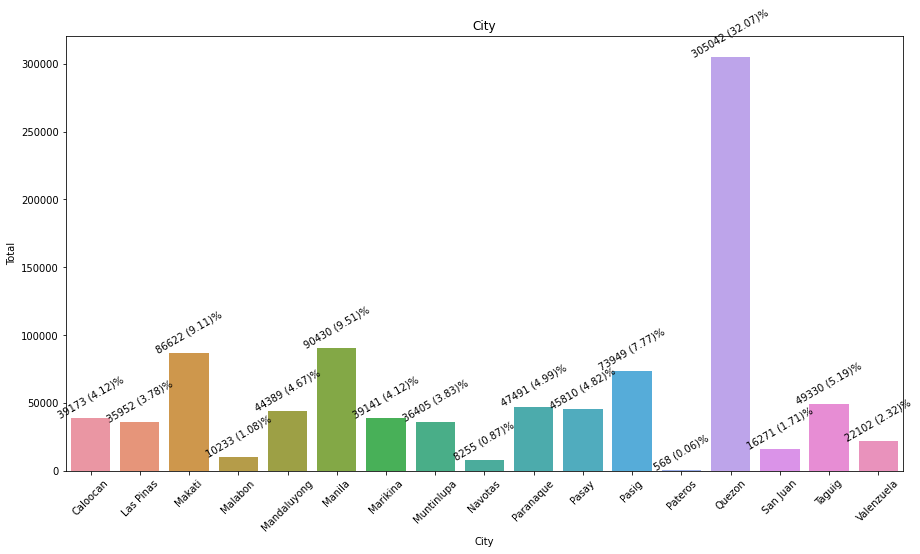

In [55]:
plt.figure(figsize=(15,8))
g =sns.barplot(x='City',y='Total',data=groupedvalues)
plt.xticks(rotation=45)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Total, str(round(row.Total,2)) +
       ' (' + str(round((round(row.Total,2) / total) * 100, 2)) + ')%' ,
       color='black', ha="center",fontsize = 10, rotation=30)
plt.title('City')

# Non Fatal of Road Accidents Barplot

In [74]:
# NON FATAL BAR PLOT
overall_total =groupedvalues.iloc[:,3].values

total = 0
for i in overall_total:
    total += i
total

181177

Text(0.5, 1.0, 'City')

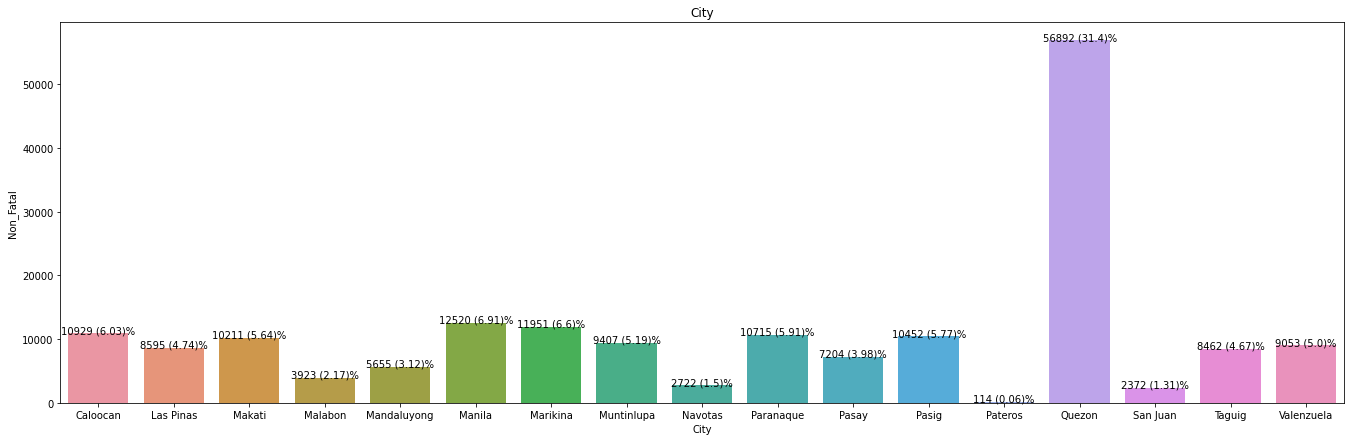

In [75]:
plt.figure(figsize=(23,7))
g =sns.barplot(x='City',y='Non_Fatal',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Non_Fatal, str(round(row.Non_Fatal,2)) +
       ' (' + str(round((round(row.Non_Fatal,2) / total) * 100, 2)) + ')%' ,
       color='black', ha="center",fontsize = 10)
plt.title('City')

# Fatal of Road Accidents Barplot

In [76]:
# FATAL BAR PLOT
overall_total =groupedvalues.iloc[:,2].values

total = 0
for i in overall_total:
    total += i
total

4285

Text(0.5, 1.0, 'City')

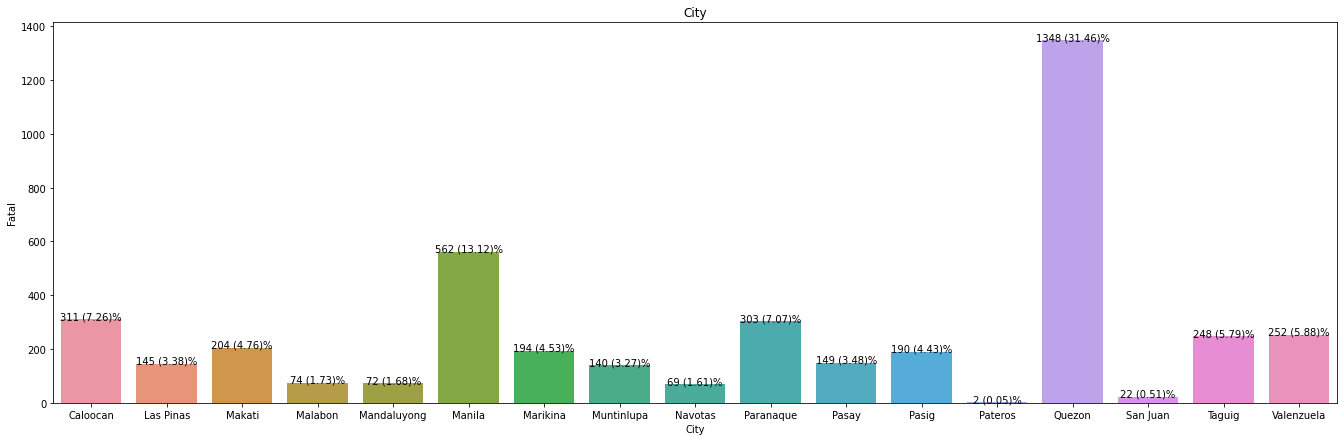

In [77]:
plt.figure(figsize=(23,7))
g =sns.barplot(x='City',y='Fatal',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Fatal, str(round(row.Fatal,2)) +
       ' (' + str(round((round(row.Fatal,2) / total) * 100, 2)) + ')%' ,
       color='black', ha="center",fontsize = 10)
plt.title('City')

# Damage to property of Road Accidents Barplot

In [78]:
# DAMAGE TO PROPERTY BAR PLOT
overall_total =groupedvalues.iloc[:,1].values

total = 0
for i in overall_total:
    total += i
total

765701

Text(0.5, 1.0, 'City')

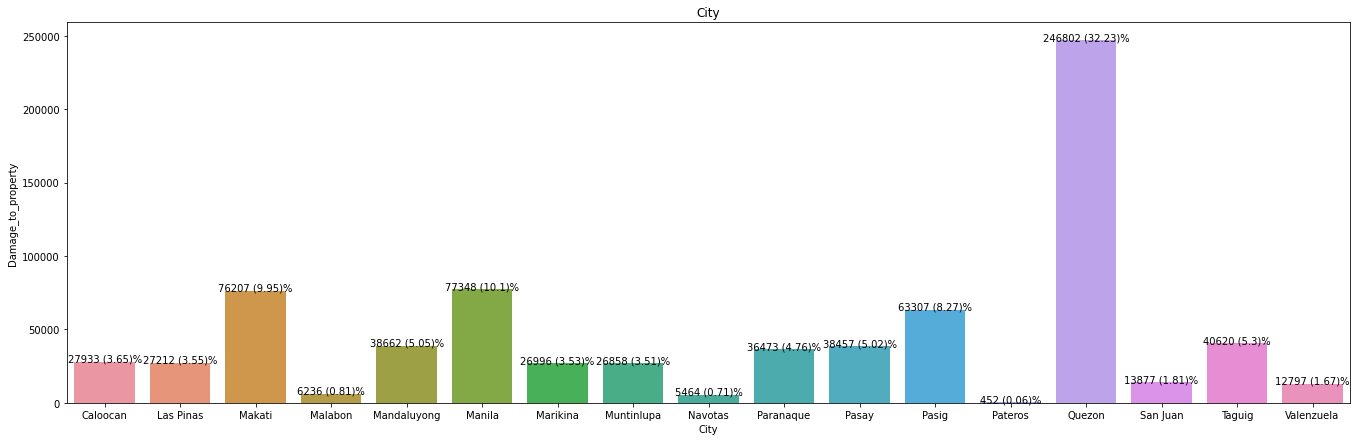

In [80]:
plt.figure(figsize=(23,7))
g =sns.barplot(x='City',y='Damage_to_property',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Damage_to_property, str(round(row.Damage_to_property,2)) +
       ' (' + str(round((round(row.Damage_to_property,2) / total) * 100, 2)) + ')%' ,
       color='black', ha="center",fontsize = 10)
plt.title('City')

# Year of Road Accident Barplot

Text(0.5, 1.0, 'City')

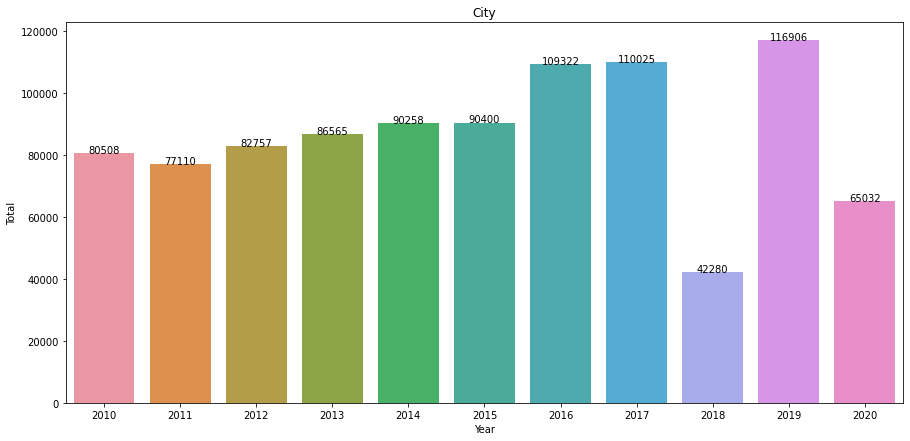

In [19]:
groupedvalues = df.groupby('Year').sum().reset_index()
groupedvalues.head()

plt.figure(figsize=(15,7))
g =sns.barplot(x='Year',y='Total',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Total, round(row.Total,2), color='black', ha="center")
plt.title('City')

# Cluster barplot 

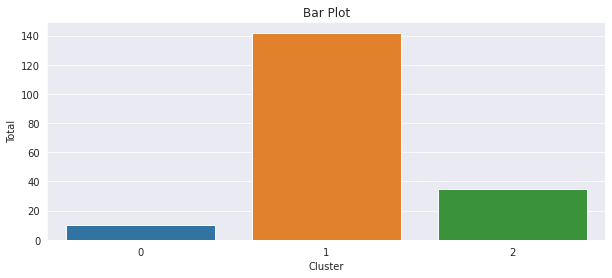

In [20]:
genders = df.Cluster.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title('Bar Plot')
plt.xlabel('Cluster')
plt.ylabel('Total')
plt.show()

In [21]:
df.Cluster.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    75.9%
2    18.7%
0     5.3%
Name: Cluster, dtype: object

# Cross tabulation

In [22]:
ct = pd.crosstab(df['Cluster'], df['City'])

In [23]:
print(ct)

City     Caloocan  Las Pinas  Makati  Malabon  Mandaluyong  Manila  Marikina  \
Cluster                                                                        
0               0          0       0        0            0       0         0   
1              11         11       3       11            8       3        11   
2               0          0       8        0            3       8         0   

City     Muntinlupa  Navotas  Paranaque  Pasay  Pasig  Pateros  Quezon  \
Cluster                                                                  
0                 0        0          0      0      0        0      10   
1                11       11         11      8      2       11       0   
2                 0        0          0      3      9        0       1   

City     San Juan  Taguig  Valenzuela  
Cluster                                
0               0       0           0  
1              11       8          11  
2               0       3           0  


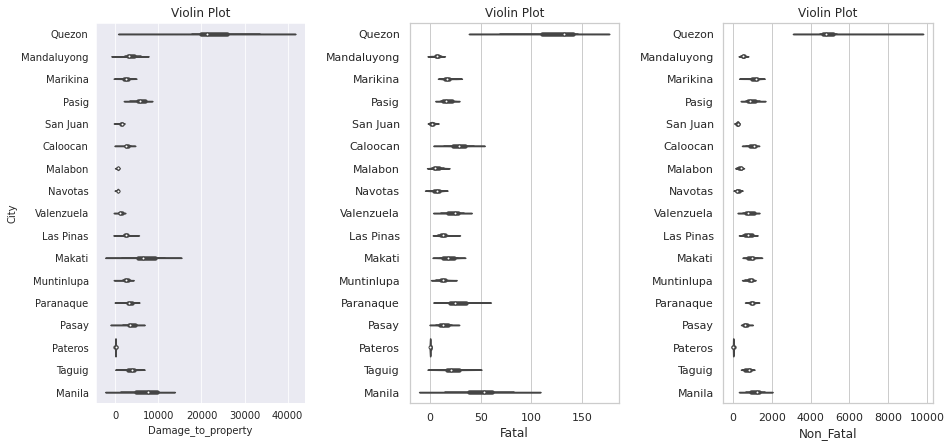

In [24]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Damage_to_property', 'Fatal', 'Non_Fatal']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'City' , data = df)
    plt.ylabel('City' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()

# Scatterplot with ConvexHull

In [104]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Damage_to_property', 'Fatal', 'Non_Fatal']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

Text(0, 0.5, 'Fatal')

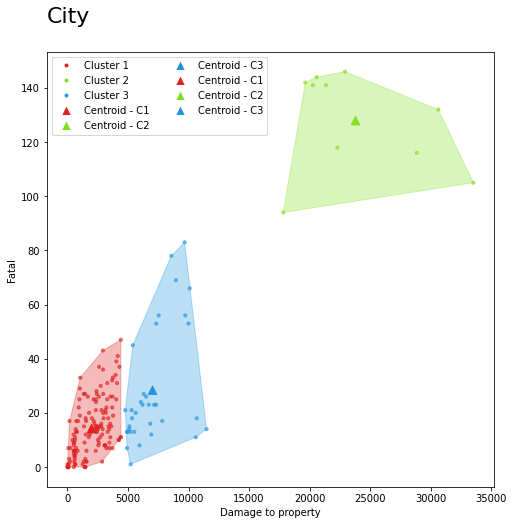

In [106]:
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Damage_to_property, df.Fatal, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Damage_to_property', 'Fatal']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

# label each data points
# data=df.iloc[:,0:2].values
# for i in range(len(data)):
#     x = data[i][0]
#     y = data[i][1]
#     plt.text(x * (1 + 0.01), y * (1 + 0.01), df.City[i], fontsize=8)
    
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]

legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper left', ncol=2)

plt.title('City\n', loc='left', fontsize=22)
plt.xlabel('Damage to property')
plt.ylabel('Fatal')
    
# plt.xlim(0,10000)
# plt.ylim(0,10000)